In [2]:
# importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Issues Faced

 1.UnicodeDecodeError: 'utf-8' codec can't decode byte 0xfc in position
 Solution_1: use encoding = "unicode_escape"

In [3]:
# Reading the csv file

df = pd.read_csv("C://Users/harsh//My Portfolio Projects//Diwali Sales Analysis//Diwali_Sales.csv", encoding ="unicode_escape")

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.shape

(11251, 15)

In [6]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [7]:
# finding how many columns or features are present

len(df.columns)

15

In [8]:
# drop columns "status" and "unnamed1"

df = df.drop(['Status','unnamed1'], axis =1)
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [9]:
# checking the null values

pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
User_ID             11251 non-null int64
Cust_name           11251 non-null object
Product_ID          11251 non-null object
Gender              11251 non-null object
Age Group           11251 non-null object
Age                 11251 non-null int64
Marital_Status      11251 non-null int64
State               11251 non-null object
Zone                11251 non-null object
Occupation          11251 non-null object
Product_Category    11251 non-null object
Orders              11251 non-null int64
Amount              11239 non-null float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [11]:
# dropping all the rows where "amount" has null values

df = df.dropna(subset=['Amount'])

In [12]:
df.shape

(11239, 13)

In [13]:
# Changing data type of columns

df['Amount'] = df['Amount'].astype('int')

In [14]:
df['User_ID'] = df['User_ID'].astype('object')

In [15]:
df['Amount'].dtype

dtype('int32')

In [16]:
df.describe()

,Age,Marital_Status,Orders,Amount
count,11239.000000,11239.000000,11239.000000,11239.000000
mean,35.410357,0.420055,2.489634,9453.610553
std,12.753866,0.493589,1.114967,5222.355168
min,12.000000,0.000000,1.000000,188.000000
25%,27.000000,0.000000,2.000000,5443.000000
50%,33.000000,0.000000,2.000000,8109.000000
75%,43.000000,1.000000,3.000000,12675.000000
max,92.000000,1.000000,4.000000,23952.000000


In [17]:
# Using describe() on specific columns

df[['Age','Amount']].describe()

,Age,Amount
count,11239.000000,11239.000000
mean,35.410357,9453.610553
std,12.753866,5222.355168
min,12.000000,188.000000
25%,27.000000,5443.000000
50%,33.000000,8109.000000
75%,43.000000,12675.000000
max,92.000000,23952.000000


## Exploratory Data Analysis

### Gender

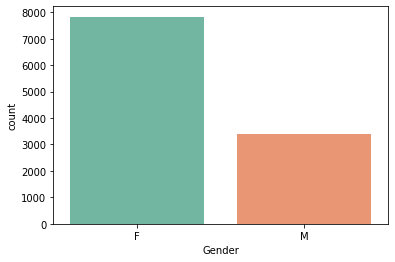

In [29]:
ax = sns.countplot(x='Gender',data=df, palette='Set2')

In [46]:
sales_gender = df.groupby(by=df['Gender'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending = False)
sales_gender

,Gender,Amount
0,F,74335853
1,M,31913276


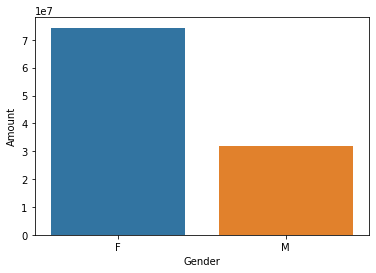

In [49]:
sns.barplot(x='Gender', y='Amount', data=sales_gender)

Observation: Most of the buyers are females. Majority of sales is coming from females

### Age

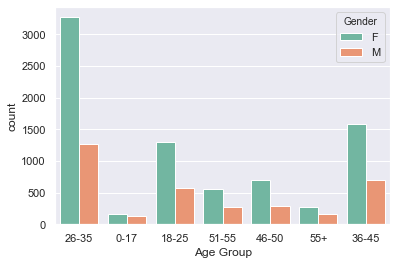

In [56]:
sns.set(style='darkgrid')
sns.countplot(x='Age Group',data=df, hue='Gender', palette='Set2')

In [57]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [63]:
sales_age_group = df.groupby(by='Age Group', as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sales_age_group

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


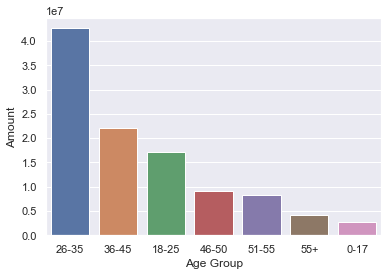

In [67]:
sns.barplot(x='Age Group', y='Amount', data=sales_age_group)

Observation: Females in the age bracket 26-35 are driving the sales

### State

In [76]:
# Total number of orders from top 10 states

sales_state_orders = df.groupby(by='State', as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False)
sales_state_orders.head()

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252


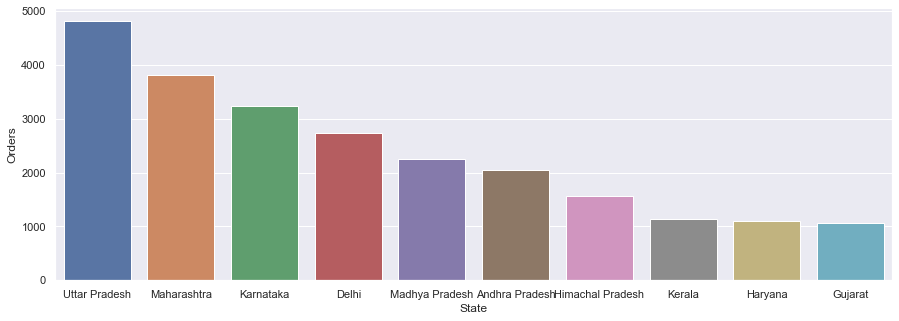

In [77]:
sns.set(rc={'figure.figsize':(15,5)})

sns.barplot(x='State', y='Orders',data=sales_state_orders.head(10))

In [81]:
# Total amount from top 10 states

sales_state_amount = df.groupby(by='State', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sales_state_amount.head()

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142


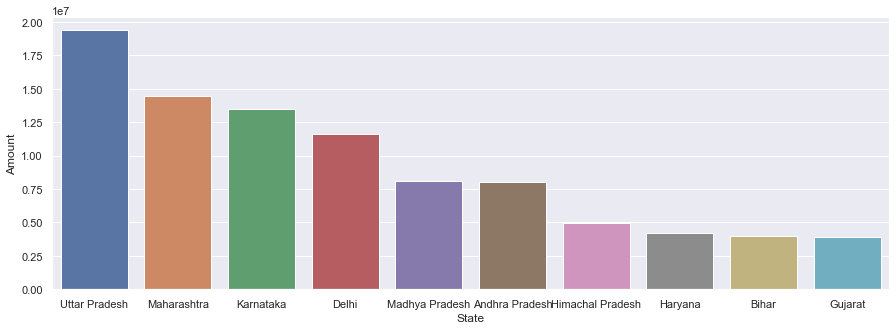

In [82]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='State', y='Amount',data=sales_state_amount.head(10))

Observation: Majority of the ordres are placed in UP, MH, and Karnataka from where majority of the sales are coming from

### Marital Status

In [83]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


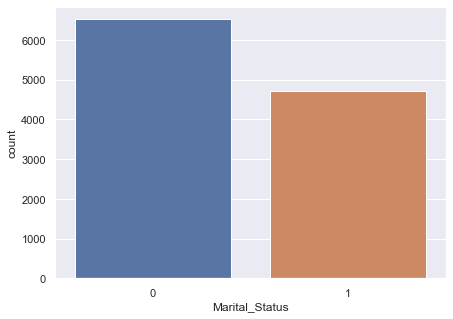

In [93]:
sns.set(rc={'figure.figsize':(7,5)})
ax = sns.countplot(x='Marital_Status', data=df)

In [104]:
sales_marital_status = df.groupby(by=['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sales_marital_status

,Marital_Status,Gender,Amount
0,0,F,43786646
2,1,F,30549207
1,0,M,18338738
3,1,M,13574538


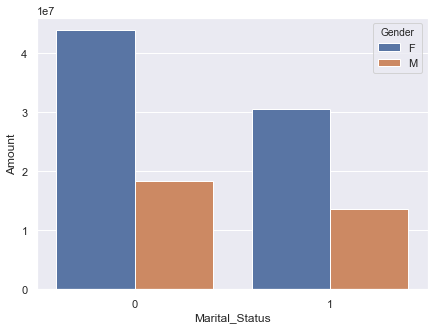

In [107]:
sns.barplot(x='Marital_Status', y='Amount',hue='Gender', data=sales_marital_status)

Observation: unmarried women are driving the diwali sales

### Occupation

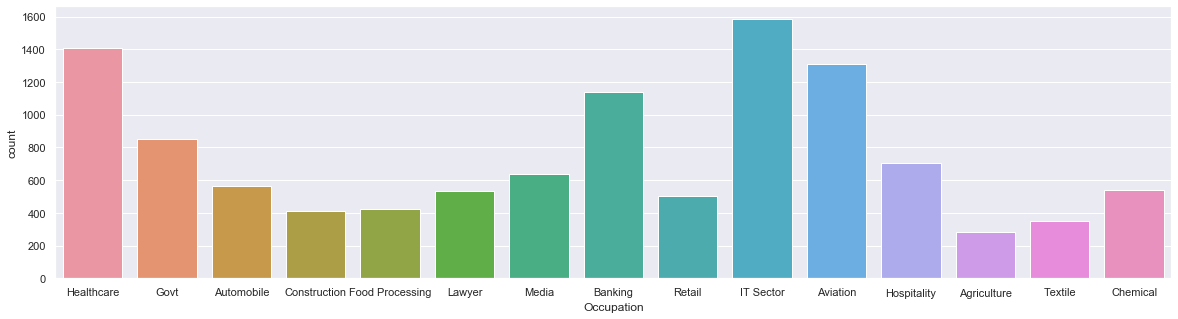

In [108]:
sns.set(rc={'figure.figsize':(20,5)})

sns.countplot(x='Occupation', data=df)

In [109]:
sales_occupation = df.groupby(by=['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sales_occupation

,Occupation,Amount
10,IT Sector,14755079
8,Healthcare,13034586
2,Aviation,12602298
3,Banking,10770610
7,Govt,8517212
9,Hospitality,6376405
12,Media,6295832
1,Automobile,5368596
4,Chemical,5297436
11,Lawyer,4981665


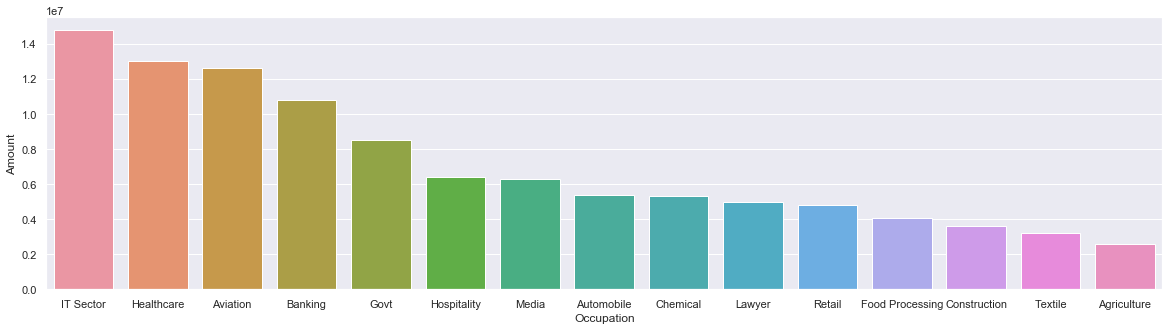

In [110]:
sns.barplot(x='Occupation', y='Amount', data=sales_occupation)

Observation: Diwali sales is driven by employees in IT, Healthcare and Aviation industries

### Product Category

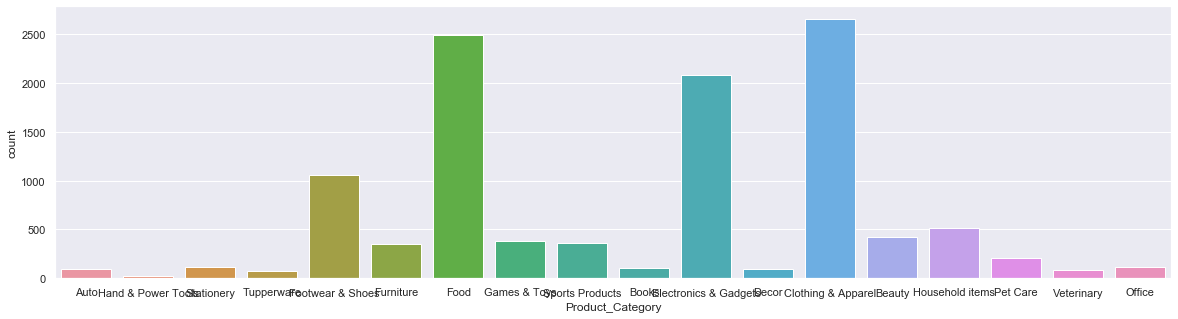

In [111]:
sns.set(rc={'figure.figsize':(20,5)})

sns.countplot(x='Product_Category', data=df)

In [116]:
sales_Product = df.groupby(by=['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sales_Product


,Product_Category,Amount
6,Food,33933883
3,Clothing & Apparel,16495019
5,Electronics & Gadgets,15643846
7,Footwear & Shoes,15575209
8,Furniture,5440051
9,Games & Toys,4331694
14,Sports Products,3635933
1,Beauty,1959484
0,Auto,1958609
15,Stationery,1676051


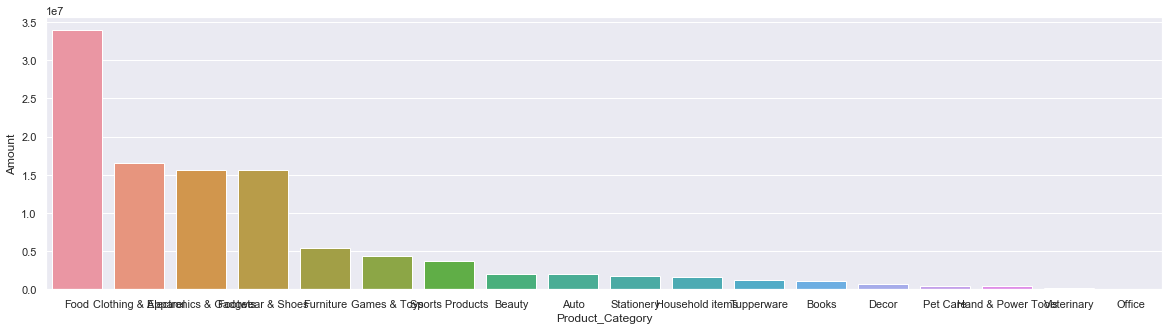

In [115]:
sns.barplot(x='Product_Category', y='Amount', data=sales_Product)

Observation: People are spending the highest amount on Food followed by Clothing